In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # Data visualization

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Load training dataset

In [2]:
Df = pd.read_csv("../input/titanic/train.csv")
Df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
Df.shape

(891, 12)

In [4]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Check for NaN values

In [5]:
Df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

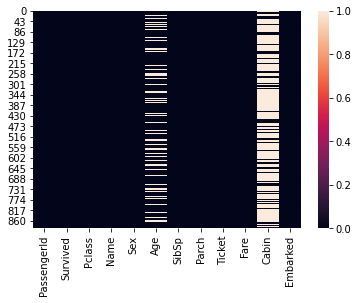

In [6]:
sns.heatmap(Df.isna())

In [7]:
df = Df.copy()
df.drop(axis=1, columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
df.groupby(by=df['Sex']).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [9]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
df['Age'].mean()

29.69911764705882

In [11]:
df.groupby(df['Embarked']).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,
C,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812


In [12]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [13]:
df2 = df.loc[(df['Sex']=='male'), ['Survived', 'Age', 'Fare']]
df2

,Survived,Age,Fare
0,0,22.0,7.2500
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
...,...,...,...
883,0,28.0,10.5000
884,0,25.0,7.0500
886,0,27.0,13.0000
889,1,26.0,30.0000


In [14]:
df2.loc[df2['Survived']==1, 'Fare'].describe()

count    109.000000
mean      40.821484
std       71.355967
min        0.000000
25%        9.500000
50%       26.287500
75%       39.000000
max      512.329200
Name: Fare, dtype: float64

109 Males survived

In [15]:
df3 = df.loc[(df['Sex']=='female'), ['Survived', 'Age', 'Fare']]
df3

,Survived,Age,Fare
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
8,1,27.0,11.1333
9,1,14.0,30.0708
...,...,...,...
880,1,25.0,26.0000
882,0,22.0,10.5167
885,0,39.0,29.1250
887,1,19.0,30.0000


In [16]:
df3.loc[df3['Survived']==1, 'Fare'].describe()

count    233.000000
mean      51.938573
std       64.102256
min        7.225000
25%       13.000000
50%       26.000000
75%       76.291700
max      512.329200
Name: Fare, dtype: float64

233 Females survived.
So, total number of people survived = 342

In [17]:
df2.loc[df2['Survived']==1, 'Age'].describe()

count    93.000000
mean     27.276022
std      16.504803
min       0.420000
25%      18.000000
50%      28.000000
75%      36.000000
max      80.000000
Name: Age, dtype: float64

In [18]:
df3.loc[df3['Survived']==1, 'Age'].describe()

count    197.000000
mean      28.847716
std       14.175073
min        0.750000
25%       19.000000
50%       28.000000
75%       38.000000
max       63.000000
Name: Age, dtype: float64

The overall 'Age' mean and 'Age' mean for those who survived do not vary enough to consider differently, for both males and females. So, let's fill NaN values in 'Age' values by overall mean.

In [19]:
df.loc[df['Sex']=='female', 'Age'] = df.loc[df['Sex']=='female', 'Age'].fillna(value=27.9157)
df.loc[df['Sex']=='male', 'Age'] = df.loc[df['Sex']=='male', 'Age'].fillna(value=30.7266)

In [20]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [21]:
df.dropna(inplace=True)

## Handle with categorical features

In [22]:
gender_dummy = pd.get_dummies(df['Sex'], drop_first=True)
gender_dummy.head()

,male
0,1
1,0
2,0
3,0
4,1


In [23]:
embarked_dummy = pd.get_dummies(df['Embarked'], drop_first=True)
embarked_dummy.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [24]:
df = pd.concat([df, gender_dummy, embarked_dummy], axis=1)
df.drop(columns=['Sex', 'Embarked'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Load test dataset

In [25]:
df_test = pd.read_csv("../input/titanic/test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
df_test.shape

(418, 11)

### Check for missing values

<AxesSubplot:>

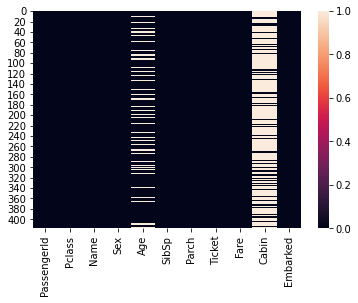

In [27]:
sns.heatmap(df_test.isnull())

In [28]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [29]:
df_test.drop(columns=['Cabin'], axis=1, inplace=True)

In [30]:
df_test.at[df_test['Fare'].isnull(), 'Fare'] = np.mean(df_test['Fare'])

In [31]:
df_test.groupby('Sex').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,1096.789474,2.144737,30.272362,0.565789,0.598684,49.747699
male,1102.620301,2.334586,30.272732,0.379699,0.274436,27.558326


In [32]:
df_test['Age'] = df_test['Age'].fillna(30.27)

In [33]:
df_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [34]:
sex = pd.get_dummies(df_test['Sex'], drop_first=True)
embarked = pd.get_dummies(df_test['Embarked'], drop_first=True)

In [35]:
df_test = pd.concat([df_test, sex, embarked], axis=1)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1


In [36]:
df_test.drop(columns=['Name', 'Ticket', 'Sex', 'Embarked'], axis=1, inplace=True)
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


## Prepare final training and test dataset and build model

In [37]:
X_train = df.drop(columns=['Survived'], axis=1)
y_train = df['Survived']
X_test = df_test.drop(columns=['PassengerId'], axis=1).copy()

In [38]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='liblinear', penalty='l1')

In [39]:
lr_model.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [40]:
titanic_preds = lr_model.predict(X_test)

In [41]:
lr_model_acc = round(lr_model.score(X_train, y_train)*100, 2)
print("Training accuracy of the model is ", lr_model_acc)

Training accuracy of the model is  79.75


In [42]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [43]:
preds = cross_val_predict(lr_model, X_train, y_train, cv=3)
confusion_matrix(y_train, preds)

array([[471,  78],
       [109, 231]])

In [44]:
submit = pd.read_csv("../input/titanic/gender_submission.csv")
submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [45]:
submit['Survived'] = titanic_preds
submit.to_csv("submit.csv", index=False)